In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D,MaxPooling1D,Flatten
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data1=pd.read_csv("/content/drive/MyDrive/Dataset/Cyberbullying_Final_labell.csv")


In [4]:
data1.sample(10)

,Unnamed: 0.1,Unnamed: 0,Date,User,Tweet,label
3914,3914,3914,2023-03-02 23:52:52+00:00,dkbkbrainrot,@hornybaku 69% yes oh yea,0
24237,24237,4237,2023-03-02 23:49:24+00:00,Tinyurl_org,@criminalplaza She openly admitted to stalking...,1
17221,17221,2221,2023-03-02 23:58:36+00:00,RehxFnbr,@TeamSummitGG uhhh i definitely meet the requi...,0
15862,15862,862,2023-03-02 23:59:26+00:00,Brutuscass,"@LynnParkPDog @bennyjohnson I had guessed so, ...",0
35230,35230,10230,2023-03-02 23:59:37+00:00,marchessanaih_,@dbamoureuse Happy birthday 🥳,0
54563,54563,29556,2023-03-02 23:58:54+00:00,Tyron911147,@0x0000CB @JayThomasEmrys @intermarium24 Polan...,1
41317,41317,16317,2023-03-02 23:59:23+00:00,venusianhunty,Virgo risings should be here too tbh,0
39580,39580,14580,2023-03-02 23:59:27+00:00,SUPERLEGENDSS,Please tell me Callie and Jamie don’t break up...,0
34061,34061,9061,2023-03-02 23:59:40+00:00,mikengu94250430,Are you talking to the dead people creepy joe,1
28078,28078,3078,2023-03-02 23:59:53+00:00,rosebudskier,@NYCTheMiC How’s the seat!! So exciting to be ...,0


In [5]:
data1 = data1[['Tweet', 'label']]

In [6]:
list = ["Tweet", "label"]

In [7]:
data1.shape

(55007, 2)

**Preprocessing**

Empty Row removal

In [8]:
# Misssing data

data1.isnull().sum()

Tweet    7
label    0
dtype: int64

In [9]:
empty_real_index = [index for index,Body in enumerate(data1.Tweet.tolist()) if str(Body).strip()==""]
data1.iloc[empty_real_index]

,Tweet,label


In [10]:
empty_real_index

[]

In [11]:
data = data1.drop(empty_real_index,axis=0)

In [12]:
data.isnull().sum()

Tweet    7
label    0
dtype: int64

In [13]:
data.shape

(55007, 2)

**Preprocessing**

In [14]:
# Misssing data

data.isnull().sum()

Tweet    7
label    0
dtype: int64

In [15]:
empty_real_index = [index for index,Tweet in enumerate(data.Tweet.tolist()) if str(Tweet).strip()==""]
data.iloc[empty_real_index]

,Tweet,label


In [16]:
empty_real_index

[]

In [17]:
data = data.drop(empty_real_index,axis=0)

In [18]:
data.isnull().sum()

Tweet    7
label    0
dtype: int64

In [19]:
 data=data.dropna()

Word **Cloud**

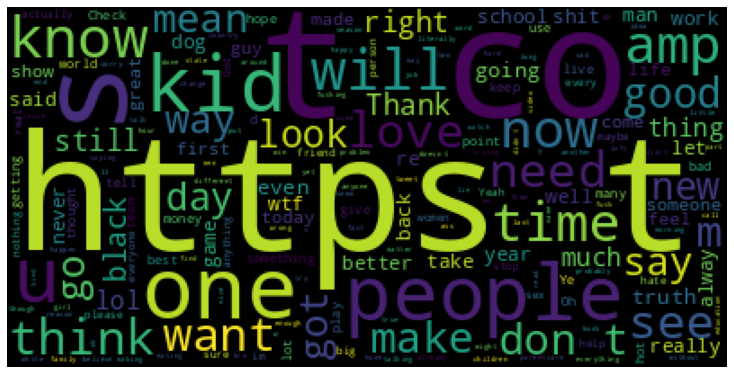

In [ ]:
text = ' '.join(data['Tweet'].tolist())
wordcloud = WordCloud().generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.shape

(55000, 2)

Data **chart**

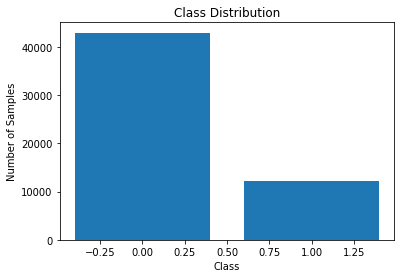

In [ ]:
import matplotlib.pyplot as plt

# Count the number of samples in each class
class_counts = data['label'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')

# Show the chart
plt.show()


In [20]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

*Tokenization**

In [21]:
data['Tweet'] = data.apply(lambda row: nltk.word_tokenize(row['Tweet']), axis=1)

In [22]:
data.head(5)

,Tweet,label
0,"[@, tookyacb, i, am, very, naïve, ., gullible,...",0
1,"[@, MattWalshBlog, You, see, ,, this, is, what...",1
2,"[@, masterofoneinc1, Would, wear, and, Black, ...",1
3,"[5, drinks, to, get, to, know, me, ., -Ribenna...",0
4,"[@, AthyLion, @, s0ftbyte, Because, that, 's, ...",0


StorpWord Rem

In [23]:
stop = stopwords.words('english')
data['Tweet'] = data['Tweet'].apply(lambda x: [item for item in x if item not in stop])

**Stemmization**

In [24]:
# def stemmize_text(text):
#     stemmer = PorterStemmer()
#     return [stemmer.stem(w) for w in text]

# data['Tweet'] = data['Tweet'].apply(stemmize_text)

Detokenize **Words**

In [25]:
def detokenize_words(text):
    text = TreebankWordDetokenizer().detokenize(text)
    return text

data['Tweet'] = data['Tweet'].apply(detokenize_words)

In [26]:
data.head(5)

,Tweet,label
0,"@ tookyacb naïve . gullible . tend get ""situat...",0
1,"@ MattWalshBlog You see, happens take morality...",1
2,@ masterofoneinc1 Would wear Black Sabbath,1
3,5 drinks get know . -Ribenna . -Chi exotic (co...,0
4,@ AthyLion @ s0ftbyte Because's happened 10 mi...,0


Removing Unecessary things: **Puntuations**, Special character

In [27]:
def drop_unnecessary(text):
  text = text.lower()
  text = re.sub('https?://\S+|www\.S+', '',text)
  text = re.sub('[^A-Za-z0-9\s]+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
  text = re.sub('\n', '',text)
  return text

data['Tweet'] = data['Tweet'].apply(drop_unnecessary)

In [28]:
data.head(10)

,Tweet,label
0,tookyacb nave gullible tend get situations,0
1,mattwalshblog you see happens take morality s...,1
2,masterofoneinc1 would wear black sabbath,1
3,5 drinks get know ribenna chi exotic coconut...,0
4,athylion s0ftbyte becauses happened 10 minut...,0
5,phillysil327 jayhawk1980 therajgiri i never...,0
6,check listing i added poshmark closet skechers...,1
7,tooforwon241 swipacam 71 point game nba like...,1
8,hiphopstorian im good tether doxing,0
9,projectlincoln hot dog flavored water,0


In [29]:
Xm = data["Tweet"]
ym = data["label"]

In [30]:
Xm_train, Xm_test, ym_train, ym_test=train_test_split(Xm,ym,test_size=.20)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(Xm_train)
xv_test = vectrorization.transform(Xm_test)

Machine Learning **Model**

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB = MultinomialNB()
NB.fit(xv_train,ym_train)

MultinomialNB()

In [ ]:
NB.score(xv_test, ym_test)

0.7945454545454546

In [ ]:
pred_NB = NB.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_NB))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      8584
           1       0.96      0.07      0.13      2416

    accuracy                           0.79     11000
   macro avg       0.88      0.53      0.50     11000
weighted avg       0.83      0.79      0.72     11000



In [ ]:
nb_acc = accuracy_score(ym_test,pred_NB)
nb = pd.DataFrame([nb_acc], columns = ['Naive Bayes'])

**SVM**

In [ ]:
import sklearn
from sklearn import model_selection, svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [ ]:

SVM.fit(xv_train,ym_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
SVM.score(xv_test, ym_test)

0.9326363636363636

In [ ]:
pred_SVM = SVM.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_SVM))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8584
           1       0.89      0.79      0.84      2416

    accuracy                           0.93     11000
   macro avg       0.92      0.88      0.90     11000
weighted avg       0.93      0.93      0.93     11000



In [ ]:
svm_acc = accuracy_score(ym_test,pred_SVM)
svm = pd.DataFrame([svm_acc], columns = ['Support Vector Machine'])

<Axes: >

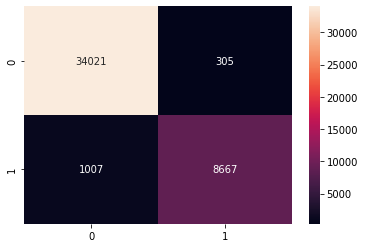

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, SVM.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
  
knn.fit(xv_train, ym_train)

In [ ]:
knn.score(xv_test, ym_test)

In [ ]:
pred_knn= knn.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_knn))

In [ ]:
knn_acc = accuracy_score(ym_test,pred_knn)
knn = pd.DataFrame([knn_acc], columns = ['KNN'])

In [ ]:
model_comp = pd.concat([svm,knn,nb], axis = 1)
model_comp

XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XG = XGBClassifier(n_estimators=30, random_state=10)
XG.fit(xv_train, ym_train)

In [ ]:
XG.score(xv_test, ym_test)

In [ ]:
pred_XG = XG.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_XG))

In [ ]:
xg_acc = accuracy_score(ym_test,pred_XG)
xg = pd.DataFrame([xg_acc], columns = ['XGBoost'])

Logistic **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, ym_train)

In [ ]:
LR.score(xv_test, ym_test)

In [ ]:
pred_LR = LR.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_LR))

In [ ]:
lr_acc = accuracy_score(ym_test,pred_LR)
lr = pd.DataFrame([lr_acc], columns = ['Logistic Regression'])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10, random_state=2)
RF.fit(xv_train, ym_train)

In [ ]:
RF.score(xv_test, ym_test)

In [ ]:
pred_RF = RF.predict(xv_test)

In [ ]:
rf_acc = accuracy_score(ym_test,pred_RF)
rf = pd.DataFrame([rf_acc], columns = ['Random Forest'])

In [ ]:
print(classification_report(ym_test, pred_RF))

Ensemble **Boosting**

In [ ]:
# Random Forest as Base Estimator
from sklearn.ensemble import AdaBoostClassifier
base_estimators = RandomForestClassifier(random_state=2)
rf_ada = AdaBoostClassifier(base_estimator=base_estimators, n_estimators=5)

In [ ]:
rf_ada.fit(xv_train, ym_train)

In [ ]:
rf_ada.score(xv_test, ym_test)

In [ ]:
pred_rf_ada= rf_ada.predict(xv_test)
en_rf_ada_acc = accuracy_score(ym_test,pred_rf_ada)
en_rf_ada = pd.DataFrame([en_rf_ada_acc], columns = ['Ensemble RF ADA'])

In [ ]:
print(classification_report(ym_test, pred_rf_ada))

EXtraTree with adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_estimators = ExtraTreesClassifier(n_estimators=100, random_state=10)
ET_ada = AdaBoostClassifier(base_estimator=base_estimators, n_estimators=5)

In [ ]:
ET_ada.fit(xv_train, ym_train)

In [ ]:
pred_ET_ada= ET_ada.predict(xv_test)
en_ET_ada_acc = accuracy_score(ym_test,pred_ET_ada)
en_ET_ada = pd.DataFrame([en_ET_ada_acc], columns = ['Ensemble ET ADA'])

In [ ]:
print(classification_report(ym_test, pred_ET_ada))

Model Comparism

In [ ]:
model_comp = pd.concat([svm,xg,et,rf,knn,lr,en_rf_ada,en_ET_ada], axis = 1)
model_comp

Hybrid ensemble **model**

In [32]:
# Import the required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
import sklearn
from sklearn import model_selection, svm
from sklearn.ensemble import GradientBoostingClassifier


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
base_estimator = ExtraTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier


# Create the base models
model1 = make_pipeline(vectorizer, LogisticRegression())
model2 = make_pipeline(vectorizer, MultinomialNB())
model3 = make_pipeline(vectorizer, RandomForestClassifier(n_estimators=300,random_state=25 ))
model4 = make_pipeline(vectorizer, GradientBoostingClassifier(n_estimators = 300,random_state=25))
model5 = make_pipeline(vectorizer, svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto') )



# Create the ensemble model
# Create the ensemble model using BaggingClassifier
ensemble_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=450, max_samples=1.0, max_features=1.0, bootstrap=True, random_state=2)
# Train the ensemble model on the training data
ensemble_model.fit(xv_train, ym_train)

#xv_train, xv_test



BaggingClassifier(base_estimator=ExtraTreeClassifier(), n_estimators=450,
                  random_state=2)

In [33]:
# Evaluate the ensemble model on the testing data
accuracy = ensemble_model.score(xv_test, ym_test)
print("Accuracy:", accuracy)

Accuracy: 0.9306363636363636


In [34]:
ensemble_model.score(xv_test, ym_test)

0.9306363636363636

In [35]:
pred_ensemble_model = ensemble_model.predict(xv_test)

In [36]:
print(classification_report(ym_test, pred_ensemble_model))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8575
           1       0.87      0.80      0.84      2425

    accuracy                           0.93     11000
   macro avg       0.91      0.88      0.90     11000
weighted avg       0.93      0.93      0.93     11000



In [37]:
ensemble_model_acc = accuracy_score(ym_test,pred_ensemble_model)
ensemble_model_print = pd.DataFrame([ensemble_model_acc], columns = ['Ensemble_Model'])

<Axes: >

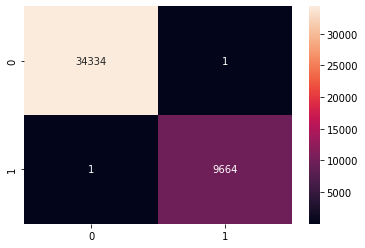

In [38]:
cm = sklearn.metrics.confusion_matrix(ym_train, ensemble_model.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")